## Project 2: The Appliances Energy Prediction

>Investigated By: Adeleke Adekola Emmanuel  
>Track: Data Science   
>ID: 188274ee0b41f000  

### Dataset Information

https://archive.ics.uci.edu/ml/machine-learning-databases/00374

The dataset for the remainder of this quiz (from question 18) is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh 

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [1]:
#import libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

%matplotlib inline

In [5]:
#Load the dataset
energy = pd.read_csv('energydata_complete.csv')
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
#create a copy of the dataset
energy1 =energy.copy()

<AxesSubplot:>

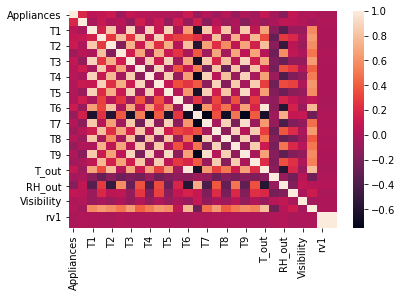

In [10]:
sns.heatmap(energy.corr())

### QUESTION 17

From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the Root Mean Squared error in three D.P?

In [88]:
x3 = energy2[['T2']]
y3 = energy2['T6']

In [89]:
#Splitting the dataset into the training set and test set
x_train,x_test, y_train, y_test= train_test_split(x3,y3, test_size= 0.3, random_state = 42)

In [90]:
regressor1 = LinearRegression()
regressor1.fit(x_train, y_train)

LinearRegression()

In [91]:
# predicting the Test set result
T6_pred = regressor1.predict(x_test)
T6_pred

array([ 2.15578912, 10.01116055,  1.87391554, ...,  4.24758774,
        8.69822311,  4.9893603 ])

In [94]:
# Rmse prediction for train set
rmse_T6 = np.sqrt(mean_squared_error(y_test, T6_pred))
round(rmse_T6, 3)

3.63

### QUESTION 18 

Remove the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a  random state of 42 (for reproducibility). Normalize the dataset using the MinMaxScaler (Hint: Use the MinMaxScaler fit_transform and transform methods on the train and test set respectively). Run a multiple linear regression using the training set. Answer the following questions:

What is the Mean Absolute Error (in three decimal places) for the  training set?

In [9]:
#Remove Date and Lights column
energy1 = energy1.drop(columns=['date', 'lights'])
energy1.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [11]:
#normalize the dataset
scaler = MinMaxScaler()
normalized_energy1 = pd.DataFrame(scaler.fit_transform(energy1), columns= energy1.columns)
features_energy1 = normalized_energy1.drop(columns=['Appliances'])
appliances_target = normalized_energy1['Appliances']

In [12]:
# Split our dataset into the training and testing dataset.
X_train,X_test, y_train,y_test = train_test_split(features_energy1,appliances_target, test_size = 0.3, random_state= 42)

In [14]:
# Fit model to the training set
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [16]:
#predict
predicted_values = linear_model.predict(X_test)
predicted_values

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [22]:
#Mean Absolute Error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 6)

0.050134

The result is different from the options, I'll use another method.

In [23]:
energy2 = energy.copy()

In [27]:
energy2 = energy2.drop(columns=['date', 'lights'])

In [28]:
x = energy2.drop(columns=['Appliances'])
y = energy2['Appliances']

In [29]:
# Split our dataset into the training and testing dataset.
X_train,X_test, y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state= 42)

In [39]:
linear_model1 = LinearRegression()
linear_model1.fit(X_test,y_test)

LinearRegression()

In [40]:
predicted_values1 = linear_model.predict(X_train)
predicted_values1

array([ 49.97775425, 100.31632974,  40.12912536, ...,  59.47229745,
       103.23225103,  88.1415215 ])

In [43]:
# mae prediction for training set
mae1 = mean_absolute_error(y_train, predicted_values1)
round(mae1, 3)

53.742

### QUESTION 19
What is the Root Mean Squared Error (in three decimal places) for the training set?

In [44]:
#  Rmse prediction for training set
rmse = np.sqrt(mean_squared_error(y_train, predicted_values1))
round(rmse, 3)

95.216

### QUESTION 20
What is the Mean Absolute Error (in three decimal places) for test set?

In [38]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [31]:
predicted_values = linear_model.predict(X_test)
predicted_values

array([ 45.54761868, 271.20410666,  46.38025696, ...,  83.23836265,
       117.34588177,  71.22751965])

In [33]:
# mae prediction for test set
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

53.643

### QUESTION 21
What is the Root Mean Squared Error (in three decimal places) for test set?

In [34]:
#  Rmse prediction for test set
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

93.64

### QUESTION 22
Did the Model above overfit to the training set

In [98]:
# Calculate performance metrics
mse_train1 = mean_squared_error(y_train, predicted_values1)
mse_test1 = mean_squared_error(y_test, predicted_values)
print(mse_train1)
print(mse_test1)

9497.079087845103
9788.792831302948


Yes

### QUESTION 23
Train a ridge regression model with default parameters. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [66]:
# Penalizing the model with Ridge on test set
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [53]:
#  Rmse prediction for test set after ridge applied
rmse3 = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

95.216

Yes

### QUESTION 24
Train a lasso regression model with default value and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [84]:
def get_weights_energy2(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_energy2 = pd.DataFrame(weights).reset_index()
    weights_energy2.columns= ['Features', col_name]
    weights_energy2[col_name].round(3)
    return weights_energy2

In [87]:
linear_model_weights = get_weights_energy2(linear_model, X_train, 'Linear_model_weight').round(3)
ridge_weights_energy2 = get_weights_energy2(ridge_reg, X_train, 'Ridge_Weight').round(3)
lasso_weights_energy2 = get_weights_energy2(lasso_reg, X_train, 'Lasso_Weight').round(3)

final_weight = pd.merge(linear_model_weights, ridge_weights_energy2, on='Features')
final_weight =pd.merge(final_weight, lasso_weights_energy2, on='Features')

final_weight

,Features,Linear_model_weight,Ridge_Weight,Lasso_Weight
0,T9,-21.148,-21.143,-20.857
1,T2,-18.370,-18.365,-18.187
2,RH_2,-13.741,-13.738,-13.645
3,T_out,-11.074,-11.070,-10.739
4,RH_8,-5.779,-5.779,-5.780
5,RH_9,-1.763,-1.763,-1.752
6,RH_7,-1.693,-1.693,-1.668
7,T5,-1.601,-1.602,-1.615
8,RH_out,-1.094,-1.093,-1.039
9,T1,-0.371,-0.372,-0.231


6 - 7

### QUESTION 25
What is the new RMSE with the Lasso Regression on the test set?

In [82]:
# Penalizing the model  with Ridge on test set
lasso_reg = Lasso(alpha=0.029) # alpha 0.001 did not work, so I increased to 0.029
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.029)

In [83]:
#  Rmse prediction for test set after lasso applied
rmse4 = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

95.216

95.216 wasn't in the option, I went for 89.932